In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
def f0_sol_eqq_eqpi(p,q,l):
    # coefs second degree polynomial: ax**2 + bx + c = 0
    r = 1/q
    a = -l
    b = 2*p*(1-l)+l+r
    c = -r
    # folution to f0:
    root = np.sqrt(b**2-4*a*c)
    print(a, b, c, root)
    f0_1 = (-b+root)/(2*a)
    f0_2 = (-b-root)/(2*a)
    return f0_1, f0_2
    # return root, root

In [14]:
# pi = 1e-10
pi = 0.0
q = 10
l = 0.05
print(f0_sol_eqq_eqpi(pi,q,l))


-0.05 0.15000000000000002 -0.1 0.050000000000000024
(1.0, 2.0000000000000004)


In [10]:
# solution obtained making the epsilon approximation:
def f0_aprox1(p,q,l):
    r = 1/q
    return 1 + 2*(1-l)*p/(l-r)

def f0_aprox1_stab(p,q,l):
    r = 1/q
    try:
        func = l-r+2*p*(1-l)*(l+r)/(l-r)
    except ZeroDivisionError:
        print(f'Divide by 0 encountered when p, q, l: {p}, {q}, {l}')
        func = 0.0
    return func

def f0_aproxrl(p,q,l):
    r = 1/q
    return r/l*(1-2*(1-l)*p/(l-r))

def f0_aproxrl_stab(p,q,l):
    r = 1/q
    func = -(l-r+2*p*(1-l)*(l+r)/(l-r))
    return func


# solution with epsilon to higher order (no se si matematicament esta be)
# I do y = 4*eps*(...+ eps) and do taylor to second order of y

def f0_aprox2_rl(p,q,l): # (+)
    r = 1/q
    eps = p*(1-l)
    eps1_coef = (1/l) * (1 - (l+r)/(l-r))
    eps2_coef = (1/l) * (-(l-r) + (l+r)**2/(l-r)**3)
    eps3_coef = (1/l) * (l+r)/(l-r)
    eps4_coef = (l-r)/l
    return r/l + eps1_coef*eps + eps2_coef*eps**2 + eps3_coef*eps**3 + eps4_coef*eps**4

def f0_aprox2_rl_stab(p,q,l):
    r = 1/q
    eps = p*(1-l)
    eps1_coef = -2*(l+r)/(l-r)
    eps2_coef = 2*(-(l-r) + (l+r)**2/(l-r)**3)
    eps3_coef = 4*(l+r)/(l-r)
    eps4_coef = 2*(l-r)
    return r-l + eps1_coef*eps + eps2_coef*eps**2 + eps3_coef*eps**3 + eps4_coef*eps**4

def f0_aprox2_1(p,q,l): # (-)
    r = 1/q
    eps = p*(1-l)
    eps1_coef = (1/l) * (1 + (l+r)/(l-r))
    eps2_coef = (1/l) * (-(l-r) + (l+r)**2/(l-r)**3)
    eps3_coef = (1/l) * (l+r)/(l-r)
    eps4_coef = (l-r)/l
    return 1 + eps1_coef*eps - eps2_coef*eps**2 - eps3_coef*eps**3 - eps4_coef*eps**4

def f0_aprox2_1_stab(p,q,l):
    r = 1/q
    eps = p*(1-l)
    eps1_coef = 2*(l+r)/(l-r)
    eps2_coef = 2*(-(l-r) + (l+r)**2/(l-r)**3)
    eps3_coef = 4*(l+r)/(l-r)
    eps4_coef = 2*(l-r)
    return l-r + eps1_coef*eps - eps2_coef*eps**2 - eps3_coef*eps**3 - eps4_coef*eps**4

In [11]:
pi, q, l = 0.0, 10, 0.05
print(f0_aprox1(pi,q,l), f0_aprox1_stab(pi,q,l))
print(f0_aproxrl(pi,q,l), f0_aproxrl_stab(pi,q,l))

1.0 -0.05
2.0 0.05


#### The approx solution f0=1 coincides with the complete solution when pi->0 !

##### For small lambda, lambda < r:

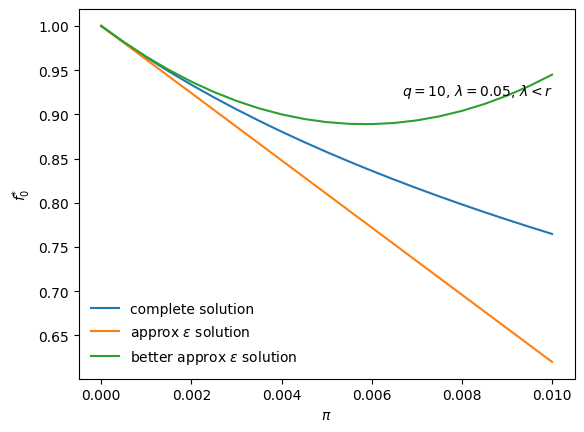

In [13]:
q, l = 10, 0.05
pi = np.linspace(0.0, 0.01, 21)
# pi = np.logspace(-3, -2, 30)

f0_full = []
f0_approx = []
f0_approx2 = []

for p in pi:
    f0_full.append(f0_sol_eqq_eqpi(p,q,l)[0])
    f0_approx.append(f0_aprox1(p,q,l))
    f0_approx2.append(f0_aprox2_1(p,q,l))

fig, ax = plt.subplots()
ax.plot(pi, f0_full, label='complete solution')
ax.plot(pi, f0_approx, label=r'approx $\varepsilon$ solution')
ax.plot(pi, f0_approx2, label=r'better approx $\varepsilon$ solution')
# ax.set_xscale('symlog')
ax.set_xlabel(r'$\pi$')
ax.set_ylabel(r'$f_0^{*}$')
fig.text(0.63,0.7,f'$q = {q}$, $\lambda = {l}$, $\lambda < r$')
ax.legend(frameon=False)
fig.savefig(f'compare_f0_sols_eqq_eqpi_q_{q}_l_{l}.png')

##### ... and for lambda > r:

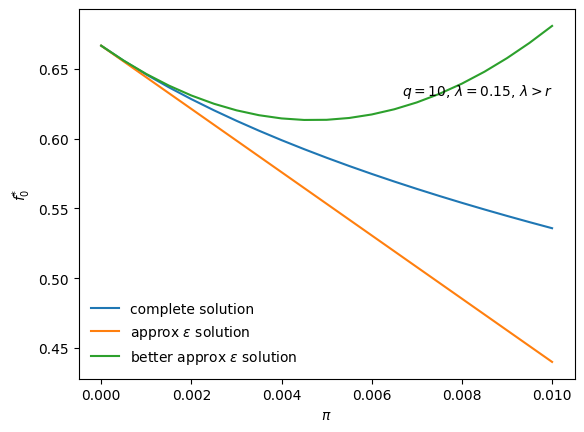

In [14]:
q, l = 10, 0.15
pi = np.linspace(0.0, 0.01, 21)

f0_full = []
f0_approx = []
f0_approx2 = []

for p in pi:
    f0_full.append(f0_sol_eqq_eqpi(p,q,l)[0])
    f0_approx.append(f0_aproxrl(p,q,l))
    f0_approx2.append(f0_aprox2_rl(p,q,l))

fig, ax = plt.subplots()
ax.plot(pi, f0_full, label='complete solution')
ax.plot(pi, f0_approx, label=r'approx $\varepsilon$ solution')
ax.plot(pi, f0_approx2, label=r'better approx $\varepsilon$ solution')
ax.set_xlabel(r'$\pi$')
ax.set_ylabel(r'$f_0^{*}$')
fig.text(0.63,0.7,f'$q = {q}$, $\lambda = {l}$, $\lambda > r$')
ax.legend(frameon=False)
fig.savefig(f'compare_f0_sols_eqq_eqpi_q_{q}_l_{l}.png')

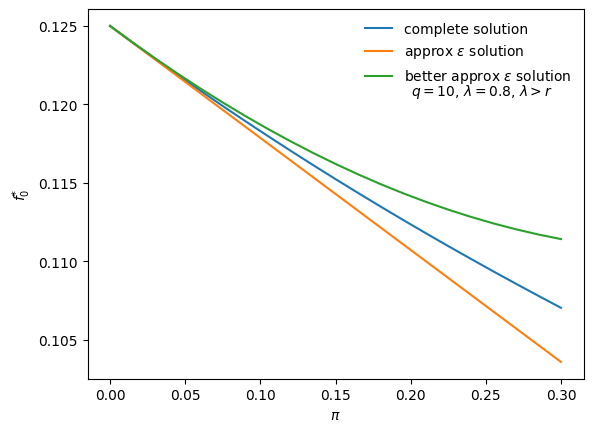

In [19]:
q, l = 10, 0.8
pi = np.linspace(0.0, 0.3, 21)

f0_full = []
f0_approx = []
f0_approx2 = []

for p in pi:
    f0_full.append(f0_sol_eqq_eqpi(p,q,l)[0])
    f0_approx.append(f0_aproxrl(p,q,l))
    f0_approx2.append(f0_aprox2_rl(p,q,l))

fig, ax = plt.subplots()
ax.plot(pi, f0_full, label='complete solution')
ax.plot(pi, f0_approx, label=r'approx $\varepsilon$ solution')
ax.plot(pi, f0_approx2, label=r'better approx $\varepsilon$ solution')
ax.set_xlabel(r'$\pi$')
ax.set_ylabel(r'$f_0^{*}$')
fig.text(0.63,0.7,f'$q = {q}$, $\lambda = {l}$, $\lambda > r$')
ax.legend(frameon=False)
fig.savefig(f'compare_f0_sols_eqq_eqpi_q_{q}_l_{l}.png')

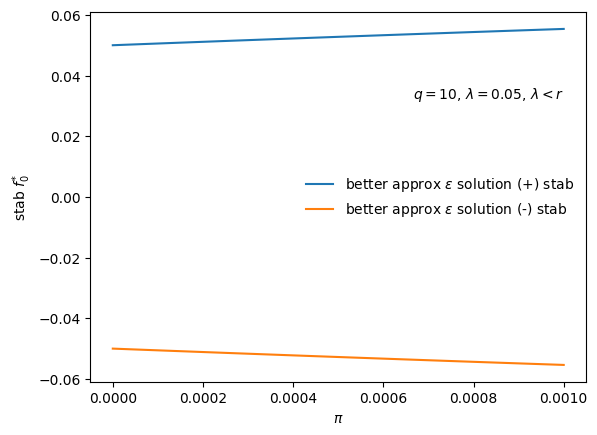

In [38]:
q, l = 10, 0.05
pi = np.linspace(0.0, 0.001, 21)

f0_approx2_rl_stab = []
f0_approx2_1_stab = []

for p in pi:
    f0_approx2_rl_stab.append(f0_aprox2_rl_stab(p,q,l))
    f0_approx2_1_stab.append(f0_aprox2_1_stab(p,q,l))

fig, ax = plt.subplots()
ax.plot(pi, f0_approx2_rl_stab, label=r'better approx $\varepsilon$ solution (+) stab')
ax.plot(pi, f0_approx2_1_stab, label=r'better approx $\varepsilon$ solution (-) stab')
ax.set_xlabel(r'$\pi$')
ax.set_ylabel(r'stab $f_0^{*}$')

if l>1/q:
    fig.text(0.63,0.7,f'$q = {q}$, $\lambda = {l}$, $\lambda > r$')
else:
    fig.text(0.63,0.7,f'$q = {q}$, $\lambda = {l}$, $\lambda < r$')
ax.legend(frameon=False)
# fig.savefig(f'compare_f0_sols_eqq_eqpi_q_{q}_l_{l}.png')

Text(0.5, 0.6, '$\\pi = 0.0, \\; q = 10$')

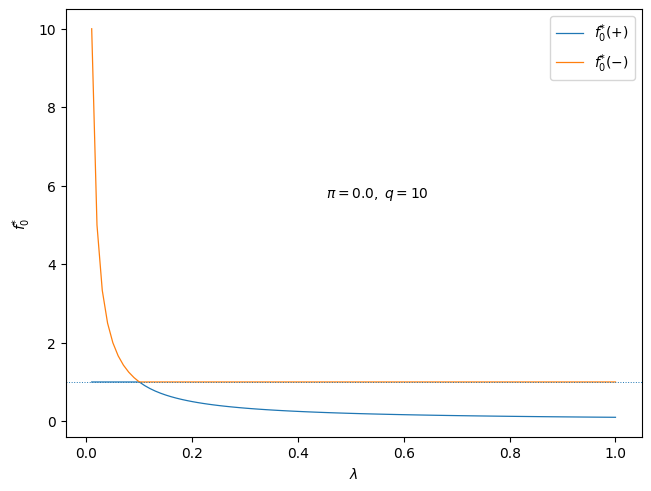

In [6]:
# p,q = 1e-8, 10
p,q = 0.0, 10

ls = np.linspace(0,1,101)
f0s_plus, f0s_minus = [], []

ls = ls[1:]
for l in ls:
    f0s = f0_sol_eqq_eqpi(p,q,l)
    f0s_plus.append(f0s[0]), f0s_minus.append(f0s[1])

fig, ax = plt.subplots(constrained_layout=True)
ax.plot(ls, f0s_plus, label='$f_0^{*}(+)$', lw=0.9)
ax.plot(ls, f0s_minus, label='$f_0^{*}(-)$', lw=0.9)
ax.axhline(1, 0, 1, lw=0.7, ls=':')
ax.legend()
ax.set(xlabel='$\lambda$', ylabel='$f_0^{*}$')
fig.text(0.5, 0.6, f'$\pi = {p}, \; q = {q}$')
# fig.savefig(f'complete_solutions_small_pi_q_{q}.png')

In [9]:
f0_sol_eqq_eqpi(0.0,10,0.05)

(1.0, 2.0000000000000004)

In [7]:
## root

def root_complete_sol(p,q,l):
    # coefs second degree polynomial: ax**2 + bx + c = 0
    r = 1/q
    a = -l
    b = 2*p*(1-l)+l+r
    c = -r
    root = np.sqrt(b**2-4*a*c)
    return root

Text(0.5, 0.6, '$\\pi = 0.0, \\; q = 10$')

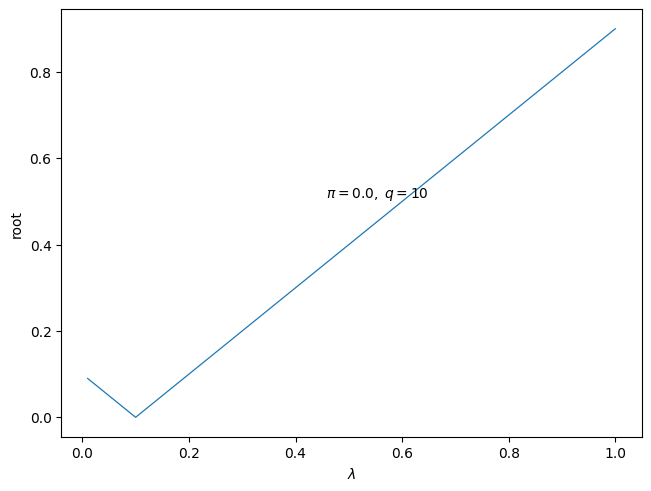

In [8]:
# p,q = 1e-8, 10
p,q = 0.0, 10

ls = np.linspace(0,1,101)
roots = []

ls = ls[1:]
for l in ls:
    root = root_complete_sol(p,q,l)

roots = [root_complete_sol(p,q,l) for l in ls]

fig, ax = plt.subplots(constrained_layout=True)
ax.plot(ls, roots, lw=0.9)
ax.set(xlabel='$\lambda$', ylabel='root')
fig.text(0.5, 0.6, f'$\pi = {p}, \; q = {q}$')
# fig.savefig(f'complete_solutions_small_pi_q_{q}.png')